In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 88.5 MB/s eta 0:00:00


In [2]:
# Deutsch Algorithm using Qiskit 2.x
# Compatible with Qiskit 2.0+ (2024–2025)

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

# Choose the function type: 'constant_0', 'constant_1', 'balanced_0', 'balanced_1'
function_type = 'balanced_1'

def deutsch_oracle(qc, function_type):
    """Implements oracle Uf for given function type."""
    if function_type == 'constant_0':
        # f(x)=0 → Do nothing
        pass
    elif function_type == 'constant_1':
        # f(x)=1 → Apply X on the output qubit
        qc.x(1)
    elif function_type == 'balanced_0':
        # f(x)=x → Apply CNOT (control: input, target: output)
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        # f(x)=NOT(x) → Apply X, then CNOT, then X
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)

In [3]:
# Step 1: Initialize quantum circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)

# Step 2: Initialize |x>|y> = |0>|1> and apply Hadamard
qc.x(1)             # Set output qubit to |1>
qc.barrier()
qc.h([0, 1])        # Apply Hadamard to both qubits

# Step 3: Apply the oracle
qc.barrier()
deutsch_oracle(qc, function_type)

In [4]:
# Step 4: Apply Hadamard to input qubit
qc.barrier()
qc.h(0)

# Step 5: Measure the first qubit
qc.measure(0, 0)

# Visualize circuit
print(qc.draw(output="text"))

           ░ ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘ ░ └───┘ ░      └───┘      ░       ║ 
c: 1/════════════════════════════════════════╩═
                                             0 


In [5]:
# Step 6: Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nMeasurement results:", counts)

# Interpret result
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")


Measurement results: {'1': 1024}
→ Function is BALANCED.


In [7]:
# Task 1: Custom Oracle Design — f(x) = x XOR 1
# Deutsch Algorithm (Qiskit 2.x Compatible, 2024–2025)

# Define custom function type
function_type = 'custom_xor1'  # f(x) = x XOR 1

def deutsch_oracle(qc, function_type):
    """Oracle Uf for given function type."""
    if function_type == 'constant_0':
        pass  # f(x)=0 → Do nothing
    elif function_type == 'constant_1':
        qc.x(1)  # f(x)=1 → Flip output qubit
    elif function_type == 'balanced_0':
        qc.cx(0, 1)  # f(x)=x → CNOT
    elif function_type == 'balanced_1':
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)  # f(x)=NOT(x)
    elif function_type == 'custom_xor1':
        # f(x) = x XOR 1 → Apply CNOT, then flip output (X on output)
        qc.cx(0, 1)
        qc.x(1)

# Step 1: Create circuit
qc = QuantumCircuit(2, 1)

# Step 2: Initialize |x>|y> = |0>|1>, apply Hadamard
qc.x(1)
qc.barrier()
qc.h([0, 1])

# Step 3: Apply oracle
qc.barrier()
deutsch_oracle(qc, function_type)

# Step 4: Apply Hadamard to input qubit
qc.barrier()
qc.h(0)

# Step 5: Measure the input qubit
qc.measure(0, 0)

# Visualize circuit
print(qc.draw(output="text"))

# Step 6: Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nMeasurement results:", counts)

# Step 7: Interpretation
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")

# Expected output: f(x) = x XOR 1 should be detected as BALANCED

"""
Understanding:
This oracle flips the output qubit after applying a CNOT, representing f(x) = x XOR 1.
Since it produces different outputs for x=0 and x=1, it is classified as a balanced function.
"""


           ░ ┌───┐ ░            ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║ 
c: 1/═══════════════════════════════════╩═
                                        0 

Measurement results: {'1': 1024}
→ Function is BALANCED.


'\nUnderstanding:\nThis oracle flips the output qubit after applying a CNOT, representing f(x) = x XOR 1.\nSince it produces different outputs for x=0 and x=1, it is classified as a balanced function.\n'

🌀 Bloch vectors after Hadamard:


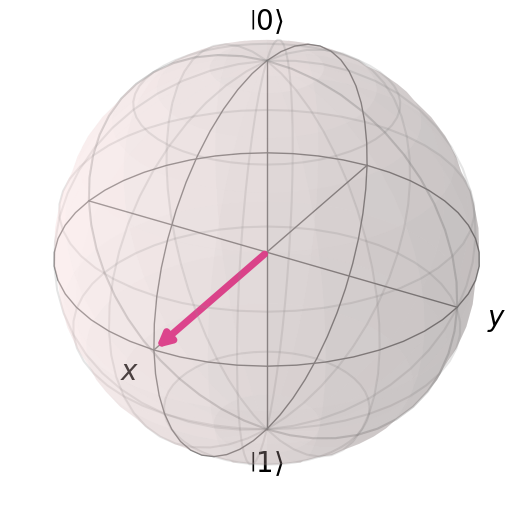

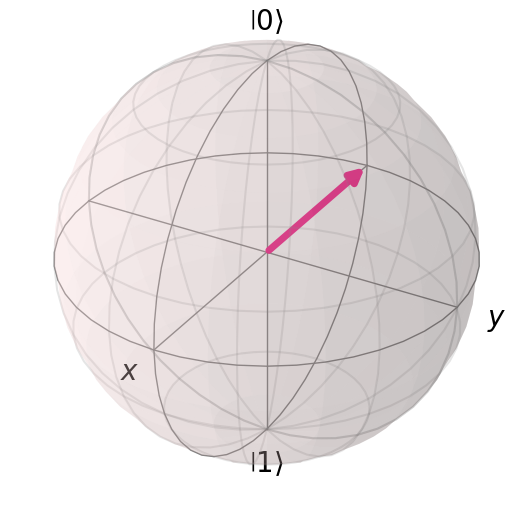

🌀 Bloch vectors after Oracle (f(x)=x XOR 1):


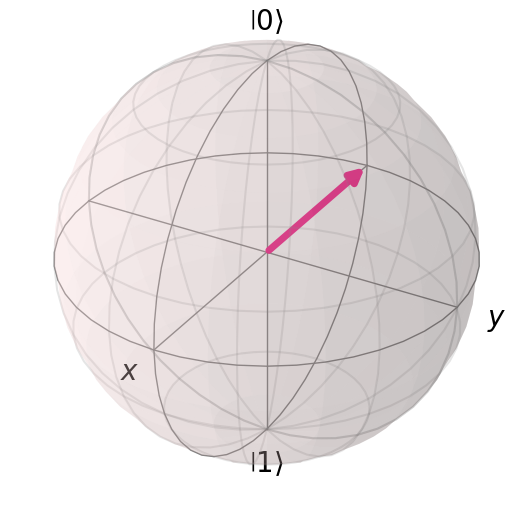

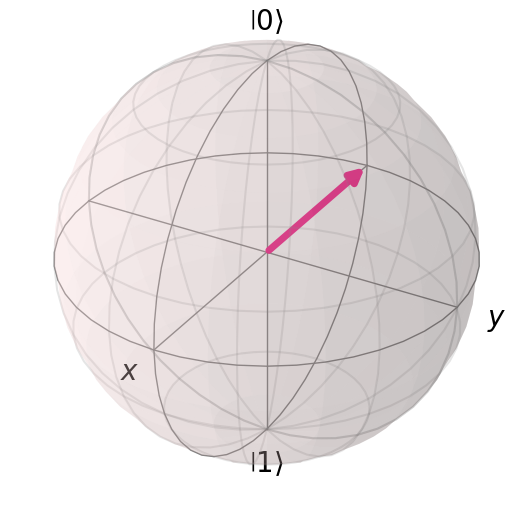


Quantum Circuit:
           ░ ┌───┐ ░            ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║ 
c: 1/═══════════════════════════════════╩═
                                        0 

Measurement results: {'1': 1024}
→ Function is BALANCED.


'\nUnderstanding:\nEach Bloch sphere shows the quantum state of individual qubits.\nAfter the Hadamard, qubits enter superposition (on X-axis); after the oracle f(x)=x XOR 1, \nthe Bloch vectors shift — interference confirms a BALANCED function.\n'

In [13]:
# ✅ Task 2 (final working version): Bloch Sphere Visualization
# Deutsch Algorithm with f(x) = x XOR 1 (Qiskit 2.x Compatible)


from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix
from qiskit_aer import AerSimulator
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt
import numpy as np

# ---- Oracle definition ----
function_type = 'custom_xor1'  # f(x) = x XOR 1

def deutsch_oracle(qc, function_type):
    if function_type == 'constant_0':
        pass
    elif function_type == 'constant_1':
        qc.x(1)
    elif function_type == 'balanced_0':
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        qc.x(0); qc.cx(0, 1); qc.x(0)
    elif function_type == 'custom_xor1':
        qc.cx(0, 1)
        qc.x(1)

# ---- Helper: Plot a single qubit Bloch sphere ----
def plot_single_qubit_bloch(rho, title=""):
    X = np.array([[0, 1], [1, 0]], dtype=complex)
    Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
    Z = np.array([[1, 0], [0, -1]], dtype=complex)
    x = np.real(np.trace(rho @ X))
    y = np.real(np.trace(rho @ Y))
    z = np.real(np.trace(rho @ Z))
    b = Bloch()
    b.add_vectors([x, y, z])
    b.title = title
    b.show()

# ---- Build Circuit ----
qc = QuantumCircuit(2, 1)

# Initialize |0>|1>
qc.x(1)
qc.barrier()

# Apply Hadamard to both qubits
qc.h([0, 1])

# ---- Bloch after Hadamard ----
state_after_h = Statevector.from_instruction(qc)
rho_after_h = DensityMatrix(state_after_h)
rho_q0_after_h = partial_trace(rho_after_h, [1])  # Trace out qubit 1
rho_q1_after_h = partial_trace(rho_after_h, [0])  # Trace out qubit 0

print("🌀 Bloch vectors after Hadamard:")
plot_single_qubit_bloch(rho_q0_after_h.data, "Qubit 0 after H")
plot_single_qubit_bloch(rho_q1_after_h.data, "Qubit 1 after H")

# ---- Apply Oracle ----
qc.barrier()
deutsch_oracle(qc, function_type)

# ---- Bloch after Oracle ----
state_after_oracle = Statevector.from_instruction(qc)
rho_after_oracle = DensityMatrix(state_after_oracle)
rho_q0_after_oracle = partial_trace(rho_after_oracle, [1])
rho_q1_after_oracle = partial_trace(rho_after_oracle, [0])

print("🌀 Bloch vectors after Oracle (f(x)=x XOR 1):")
plot_single_qubit_bloch(rho_q0_after_oracle.data, "Qubit 0 after Oracle")
plot_single_qubit_bloch(rho_q1_after_oracle.data, "Qubit 1 after Oracle")

# ---- Complete the Deutsch Algorithm ----
qc.barrier()
qc.h(0)
qc.measure(0, 0)

# Simulation
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nQuantum Circuit:")
print(qc.draw(output="text"))
print("\nMeasurement results:", counts)

# Interpretation
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")

"""
Understanding:
Each Bloch sphere shows the quantum state of individual qubits.
After the Hadamard, qubits enter superposition (on X-axis); after the oracle f(x)=x XOR 1,
the Bloch vectors shift — interference confirms a BALANCED function.
"""


In [15]:
# Task 3: Deutsch–Jozsa Extension (2-qubit input)
# Qiskit 2.x compatible (2024–2025)
# This version tests whether a 2-bit function f:{0,1}^2 -> {0,1} is constant or balanced.


# Choose the function type:
# 'constant_0' : f(x1,x2)=0 for all
# 'constant_1' : f(x1,x2)=1 for all
# 'balanced_x1': f(x1,x2)=x1
# 'balanced_x2': f(x1,x2)=x2
# 'balanced_xor': f(x1,x2)=x1 XOR x2
function_type = 'balanced_xor'

def deutsch_jozsa_oracle(qc, function_type):
    """
    Oracle Uf: |x1,x2,y> → |x1,x2, y ⊕ f(x1,x2)>
    input qubits: 0,1
    output qubit: 2
    """
    if function_type == 'constant_0':
        # f(x)=0 → do nothing
        pass
    elif function_type == 'constant_1':
        # f(x)=1 → flip output
        qc.x(2)
    elif function_type == 'balanced_x1':
        # f(x)=x1 → CNOT from qubit 0 to output
        qc.cx(0, 2)
    elif function_type == 'balanced_x2':
        # f(x)=x2 → CNOT from qubit 1 to output
        qc.cx(1, 2)
    elif function_type == 'balanced_xor':
        # f(x)=x1 XOR x2 → flip output if x1=1, also if x2=1
        qc.cx(0, 2)
        qc.cx(1, 2)

# 1) Create circuit with 3 qubits (2 inputs + 1 output) and 2 classical bits (to read x1,x2)
qc = QuantumCircuit(3, 2)

# 2) Put output qubit in |1> and Hadamard all
qc.x(2)           # |y> = |1>
qc.barrier()
qc.h([0, 1, 2])   # superposition on inputs + phase kickback on output

# 3) Oracle
qc.barrier()
deutsch_jozsa_oracle(qc, function_type)

# 4) Hadamard on input qubits again
qc.barrier()
qc.h([0, 1])

# 5) Measure only input qubits
qc.measure(0, 0)
qc.measure(1, 1)

# Show circuit
print(qc.draw(output="text"))

# 6) Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nMeasurement results:", counts)

# 7) Interpret:
# Deutsch–Jozsa rule: if result is '00' → constant, else → balanced
measured_string = list(counts.keys())[0]
if measured_string == '00':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")

"""
Understanding:
For n=2 inputs we need 2 input qubits + 1 output. We H all, call Uf, then H the inputs again.
If all input qubits collapse to |0>, the function was constant; any other pattern means balanced.
"""


           ░ ┌───┐ ░            ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├┤M├───
           ░ ├───┤ ░   │        ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║  ║ 
c: 2/═══════════════════════════════════╩══╩═
                                        0  1 

Measurement results: {'11': 1024}
→ Function is BALANCED.


'\nUnderstanding:\nFor n=2 inputs we need 2 input qubits + 1 output. We H all, call Uf, then H the inputs again.\nIf all input qubits collapse to |0>, the function was constant; any other pattern means balanced.\n'

In [17]:
# Task 4: Noise Impact on Deutsch Algorithm (base 1-input version)
# Qiskit 2.x compatible — compare ideal vs noisy simulation

from qiskit_aer.noise import NoiseModel, depolarizing_error


# -------------------------
# 1. Base Deutsch setup (same as your original base code)
# -------------------------

# Choose the function type: 'constant_0', 'constant_1', 'balanced_0', 'balanced_1'
function_type = 'balanced_1'

def deutsch_oracle(qc, function_type):
    """Implements oracle Uf for given function type."""
    if function_type == 'constant_0':
        # f(x)=0 → Do nothing
        pass
    elif function_type == 'constant_1':
        # f(x)=1 → Apply X on the output qubit
        qc.x(1)
    elif function_type == 'balanced_0':
        # f(x)=x → Apply CNOT (control: input, target: output)
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        # f(x)=NOT(x) → Apply X, then CNOT, then X
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)

# Build the circuit
qc = QuantumCircuit(2, 1)
qc.x(1)              # |y> = |1>
qc.barrier()
qc.h([0, 1])         # Put both in superposition
qc.barrier()
deutsch_oracle(qc, function_type)
qc.barrier()
qc.h(0)              # Hadamard on input to decode
qc.measure(0, 0)

print("Circuit:")
print(qc.draw(output="text"))

# -------------------------
# 2. Ideal simulation
# -------------------------
ideal_sim = AerSimulator()
ideal_qc = transpile(qc, ideal_sim)
ideal_result = ideal_sim.run(ideal_qc, shots=1024).result()
ideal_counts = ideal_result.get_counts()
print("\nIdeal measurement results:", ideal_counts)

# -------------------------
# 3. Define a simple noise model
#    (you can tune the probabilities to see stronger effects)
# -------------------------
noise_model = NoiseModel()

# depolarizing error for 1-qubit gates
one_qubit_error = depolarizing_error(0.02, 1)   # 2% noise
two_qubit_error = depolarizing_error(0.04, 2)   # 4% noise

# Add to common gates
noise_model.add_all_qubit_quantum_error(one_qubit_error, ['h', 'x'])
noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])

# -------------------------
# 4. Noisy simulation (same circuit, but with noise)
# -------------------------
noisy_sim = AerSimulator(noise_model=noise_model)
noisy_qc = transpile(qc, noisy_sim)
noisy_result = noisy_sim.run(noisy_qc, shots=1024).result()
noisy_counts = noisy_result.get_counts()
print("\nNoisy measurement results:", noisy_counts)

# -------------------------
# 5. Interpretation
# -------------------------
# In Deutsch:
#   - '0' → function is CONSTANT
#   - '1' → function is BALANCED
# Under noise, you may see the "wrong" bit appearing.

ideal_key = max(ideal_counts, key=ideal_counts.get)
noisy_key = max(noisy_counts, key=noisy_counts.get)

print("\nInterpretation (ideal):", "CONSTANT" if ideal_key == '0' else "BALANCED")
print("Interpretation (noisy):", "CONSTANT" if noisy_key == '0' else "BALANCED")

"""
Understanding:
We ran the same Deutsch circuit twice — once ideally and once with a depolarizing noise model.
The noisy run will show extra counts in the wrong bit, illustrating how noise
"""

Circuit:
           ░ ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘ ░ └───┘ ░      └───┘      ░       ║ 
c: 1/════════════════════════════════════════╩═
                                             0 

Ideal measurement results: {'1': 1024}

Noisy measurement results: {'0': 76, '1': 948}

Interpretation (ideal): BALANCED
Interpretation (noisy): BALANCED


'\nUnderstanding:\nWe ran the same Deutsch circuit twice — once ideally and once with a depolarizing noise model.\nThe noisy run will show extra counts in the wrong bit, illustrating how noise\n'

In [18]:
# Task 5: Compare Classical vs Quantum Queries (Deutsch-style)
# Based on the original 1-input Deutsch algorithm code


# -------------------------------
# 1. Define the same function types as the base code
# -------------------------------
# 'constant_0' : f(x)=0 for x in {0,1}
# 'constant_1' : f(x)=1 for x in {0,1}
# 'balanced_0' : f(x)=x
# 'balanced_1' : f(x)=NOT x

function_type = 'balanced_1'   # change here to test others

def blackbox_f(x, function_type):
    """Classical version of the same f(x) used by the quantum oracle."""
    if function_type == 'constant_0':
        return 0
    elif function_type == 'constant_1':
        return 1
    elif function_type == 'balanced_0':   # f(x)=x
        return x
    elif function_type == 'balanced_1':   # f(x)=NOT x
        return 1 - x
    else:
        raise ValueError("Unknown function type")

# -------------------------------
# 2. Classical classification
# -------------------------------
def classical_classify(function_type):
    """
    Classical way to decide if f is constant or balanced.
    We query x=0. If we ONLY query once, we can't be sure.
    So classical worst-case needs 2 queries: x=0 and x=1.
    """
    f0 = blackbox_f(0, function_type)
    f1 = blackbox_f(1, function_type)
    # If both equal → constant, else → balanced
    if f0 == f1:
        classification = "CONSTANT"
        queries_used = 2  # we did 2 queries in this simple demo
    else:
        classification = "BALANCED"
        queries_used = 2
    return classification, queries_used, f0, f1

# -------------------------------
# 3. Quantum (Deutsch) classification — base code
# -------------------------------
def deutsch_oracle(qc, function_type):
    """Quantum oracle Uf for the same function."""
    if function_type == 'constant_0':
        pass
    elif function_type == 'constant_1':
        qc.x(1)
    elif function_type == 'balanced_0':
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)

def deutsch_quantum_classify(function_type):
    # Build circuit
    qc = QuantumCircuit(2, 1)
    qc.x(1)          # |y> = |1>
    qc.barrier()
    qc.h([0, 1])     # superposition
    qc.barrier()
    deutsch_oracle(qc, function_type)
    qc.barrier()
    qc.h(0)
    qc.measure(0, 0)

    sim = AerSimulator()
    qc_compiled = transpile(qc, sim)
    result = sim.run(qc_compiled, shots=1).result()
    counts = result.get_counts()
    bit = list(counts.keys())[0]
    if bit == '0':
        classification = "CONSTANT"
    else:
        classification = "BALANCED"
    # Quantum Deutsch needs only 1 oracle call
    return classification, 1, qc, counts

# -------------------------------
# 4. Run both and compare
# -------------------------------
c_class, c_queries, f0, f1 = classical_classify(function_type)
q_class, q_queries, qc_draw, q_counts = deutsch_quantum_classify(function_type)

print("=== Classical Side ===")
print(f"function_type       : {function_type}")
print(f"f(0)                : {f0}")
print(f"f(1)                : {f1}")
print(f"classical decided   : {c_class}")
print(f"classical queries   : {c_queries}")

print("\n=== Quantum (Deutsch) Side ===")
print(qc_draw.draw(output="text"))
print(f"measurement counts  : {q_counts}")
print(f"quantum decided     : {q_class}")
print(f"quantum oracle calls: {q_queries}")

# -------------------------------
# 5. Summary
# -------------------------------
print("\n=== Comparison ===")
print("Classical: needs up to 2 queries to be 100% sure (check x=0 and x=1).")
print("Quantum (Deutsch): needs exactly 1 query to the oracle.")

"""
Understanding:
Classically, to know if f is constant or balanced, you must evaluate at least 2 inputs in the worst case.
Deutsch’s quantum version puts the input in superposition, queries once, and interference in the last Hadamard
tells you the answer with a single oracle call.
"""


=== Classical Side ===
function_type       : balanced_1
f(0)                : 1
f(1)                : 0
classical decided   : BALANCED
classical queries   : 2

=== Quantum (Deutsch) Side ===
           ░ ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘ ░ └───┘ ░      └───┘      ░       ║ 
c: 1/════════════════════════════════════════╩═
                                             0 
measurement counts  : {'1': 1}
quantum decided     : BALANCED
quantum oracle calls: 1

=== Comparison ===
Classical: needs up to 2 queries to be 100% sure (check x=0 and x=1).
Quantum (Deutsch): needs exactly 1 query to the oracle.


'\nUnderstanding:\nClassically, to know if f is constant or balanced, you must evaluate at least 2 inputs in the worst case.\nDeutsch’s quantum version puts the input in superposition, queries once, and interference in the last Hadamard\ntells you the answer with a single oracle call.\n'